In [1]:
import numpy as np  # as always import the nesscary packages / libraries. 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
class DataTransform: # use the DataTransfrom class change to the right dtypes form the .csv df. 
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df7_4analysis.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "term": "category", 
        "int_rate": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "total_payment": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_fin_x = transformer.change_dtypes(dtype_dict)

df_fin = df_fin_x.drop(columns=["Unnamed: 0"])
    
print(df_fin)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      13297208   15339420       8950.0         8950.0             8950.0   
1      10234817   12096968      11200.0        11200.0            11200.0   
2      10234813   12096964       8400.0         8400.0             8400.0   
3      10234796   12096947       9600.0         9600.0             9600.0   
4      10234755   12096906      15000.0        12000.0            15000.0   
...         ...        ...          ...            ...                ...   
20493    121673     121283       4500.0         4500.0             3000.0   
20494    120215     118760       4000.0         4000.0             3575.0   
20495    112245     112227       5000.0         5000.0             3975.0   
20496    111227     111223      20000.0        20000.0             2800.0   
20497     88046      88023       4400.0         4400.0             1400.0   

            term   int_rate  instalment grade sub_grade  ... total_rec_int 

In [3]:
class Plotter:
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None, title=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(title or f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
        plt.title(f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()

In [4]:

def calculate_expected_loss(df):
    if df["term"].dtype != "int64":
        df["term"] = df["term"].str.extract(r'(\d+)').astype('int64')

    charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()
    charged_off_loans['expected_revenue'] = charged_off_loans['instalment'] * charged_off_loans['term']
    charged_off_loans['loss_in_revenue'] = (
        charged_off_loans['expected_revenue'] - charged_off_loans['total_payment']
    )

    total_expected_revenue = charged_off_loans['expected_revenue'].sum()
    total_loss_in_revenue = charged_off_loans['loss_in_revenue'].sum()
    total_loss_percentage = (total_loss_in_revenue / total_expected_revenue) * 100
    charged_off_loans_sum = len(charged_off_loans)

    summary = {
        "Number of Charged Off Loans": charged_off_loans_sum,
        "Total Expected Revenue of Loans": total_expected_revenue,
        "Total Loss in Revenue of Loans": total_loss_in_revenue,
        "Total Loss in Revenue (%)": round(total_loss_percentage, 2)
    }

    summary_df = pd.DataFrame([summary])

    return summary_df


In [5]:
df_charged_off_stats = calculate_expected_loss(df_fin)

df_charged_off_stats

,Number of Charged Off Loans,Total Expected Revenue of Loans,Total Loss in Revenue of Loans,Total Loss in Revenue (%)
0,1118,17863482.24,12070309.05,67.57


In [6]:

df_charged_off_stats_round = df_charged_off_stats.copy() 

df_charged_off_stats_round["Total Expected Revenue of Loans (in mil)"] = \
    round(df_charged_off_stats_round["Total Expected Revenue of Loans"] / 1_000_000, 2)

df_charged_off_stats_round["Total Loss in Revenue of Loans (in mil)"] = \
    round(df_charged_off_stats_round["Total Loss in Revenue of Loans"] / 1_000_000, 2)

df_charged_off_stats_round

,Number of Charged Off Loans,Total Expected Revenue of Loans,Total Loss in Revenue of Loans,Total Loss in Revenue (%),Total Expected Revenue of Loans (in mil),Total Loss in Revenue of Loans (in mil)
0,1118,17863482.24,12070309.05,67.57,17.86,12.07


In [7]:

def charged_off_loan_analysis(df):
    charged_off_loans = df[df["loan_status"] == "Charged Off"].copy()
    charged_off_loans["total_amount_due"] = charged_off_loans["instalment"] * charged_off_loans["term"]
    charged_off_loans["amount_paid"] = charged_off_loans["total_payment"]
    charged_off_loans["amount_left_to_pay"] = charged_off_loans["total_amount_due"] - charged_off_loans["amount_paid"]
    charged_off_loans["months_paid"] = (
        (charged_off_loans["last_payment_date"] - charged_off_loans["issue_date"]).dt.days // 30
    )
    charged_off_loans["remaining_months"] = charged_off_loans["term"] - charged_off_loans["months_paid"]
    charged_off_loans["amount_per_remaining_month"] = charged_off_loans["amount_left_to_pay"] / charged_off_loans[
        "remaining_months"
    ]
    charged_off_loans["amount_per_remaining_month"].fillna(0, inplace=True)

    remaining_payment_data = []
    for _, row in charged_off_loans.iterrows():

        excess_value = 0

        for month in range(1, row["term"] + 1):

            if month < row["months_paid"]:
                remaining_payment_data.append({"Month": month, "Amount Left to Pay": 0})
            elif month == row["months_paid"]:
                if row["last_payment_amount"] == row["instalment"]:
                    remaining_payment_data.append({"Month": month, "Amount Left to Pay": 0})
                elif row["last_payment_amount"] < row["instalment"]:
                    amount_left = row["instalment"] - row["last_payment_amount"]
                    remaining_payment_data.append({"Month": month, "Amount Left to Pay": amount_left})
                else:
                    excess_value = row["last_payment_amount"] - row["instalment"]
                    remaining_payment_data.append({"Month": month, "Amount Left to Pay": 0})

            else:
                if excess_value > 0:
                    if excess_value < row["instalment"]:
                        remaining_payment_data.append({"Month": month, "Amount Left to Pay": row["instalment"] - excess_value})
                        excess_value = 0
                    elif excess_value == row["instalment"]:
                        remaining_payment_data.append({"Month": month, "Amount Left to Pay": 0})
                        excess_value = 0
                    else:
                        remaining_payment_data.append({"Month": month, "Amount Left to Pay": 0})
                        excess_value -= row["instalment"]
                else:
                    remaining_payment_data.append({"Month": month, "Amount Left to Pay": row["instalment"]})

    df_remaining_payments = pd.DataFrame(remaining_payment_data)

    instalment_payment_data = []
    for _, row in charged_off_loans.iterrows():

        excess_value = 0

        for month in range(1, row["term"] + 1):
            
            if month < row["months_paid"]:
                instalment_payment_data.append({
                    "Month": month,
                    "Instalment Due": row["instalment"],
                    "Amount Paid": row["instalment"]
                })
            elif month == row["months_paid"]:
                if row["last_payment_amount"] == row["instalment"]:
                    instalment_payment_data.append({
                        "Month": month,
                        "Instalment Due": row["instalment"],
                        "Amount Paid": row["instalment"]
                    })
                elif row["last_payment_amount"] < row["instalment"]:
                    amount_paid = row["last_payment_amount"]
                    instalment_payment_data.append({
                        "Month": month,
                        "Instalment Due": row["instalment"],
                        "Amount Paid": amount_paid
                    })
                else:
                    excess_value = row["last_payment_amount"] - row["instalment"]
                    instalment_payment_data.append({
                        "Month": month,
                        "Instalment Due": row["instalment"],
                        "Amount Paid": row["instalment"]
                    })
            else:
                if excess_value > 0:
                    if excess_value < row["instalment"]:
                        instalment_payment_data.append({
                            "Month": month,
                            "Instalment Due": row["instalment"],
                            "Amount Paid": excess_value
                        })
                        excess_value = 0
                    elif excess_value == row["instalment"]:
                        instalment_payment_data.append({
                            "Month": month,
                            "Instalment Due": row["instalment"],
                            "Amount Paid": row["instalment"]
                        })
                        excess_value = 0
                    else:
                        instalment_payment_data.append({
                            "Month": month,
                            "Instalment Due": row["instalment"],
                            "Amount Paid": row["instalment"]
                        })
                        excess_value -= row["instalment"]
                else:
                    instalment_payment_data.append({
                        "Month": month,
                        "Instalment Due": row["instalment"],
                        "Amount Paid": 0
                    })

    df_instalments_and_payments = pd.DataFrame(instalment_payment_data)

    return df_remaining_payments, df_instalments_and_payments


In [8]:
df_remaining_payments, df_instalments_and_payments = charged_off_loan_analysis(df_fin)

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_25978/3602688431.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charged_off_loans["amount_per_remaining_month"].fillna(0, inplace=True)


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_25978/3824867155.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue,


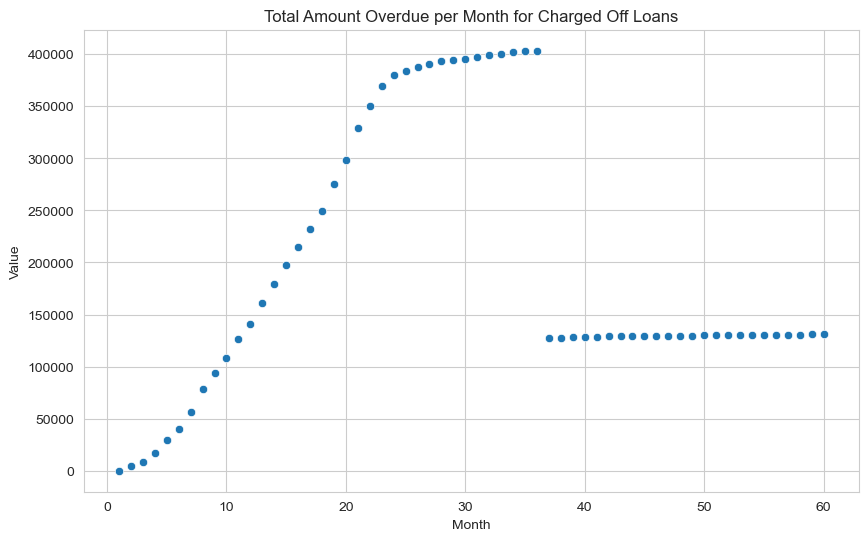

In [14]:


df_cumulative_remaining = (
    df_remaining_payments.groupby("Month", as_index=False)["Amount Left to Pay"]
    .sum()
    .rename(columns={"Amount Left to Pay": "Cumulative Amount Left to Pay"})
) 

df_cumulative_melted = df_cumulative_remaining.melt(
    id_vars=["Month"], 
    value_vars=["Cumulative Amount Left to Pay"], 
    var_name="Type", 
    value_name="Value"
) 

plotter1 = Plotter(df_cumulative_melted)  
plotter1.scatterplot(
    x="Month",
    y="Value",
    figsize=(10, 6),
    title="Total Amount Overdue per Month for Charged Off Loans"
)


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_25978/3824867155.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue,


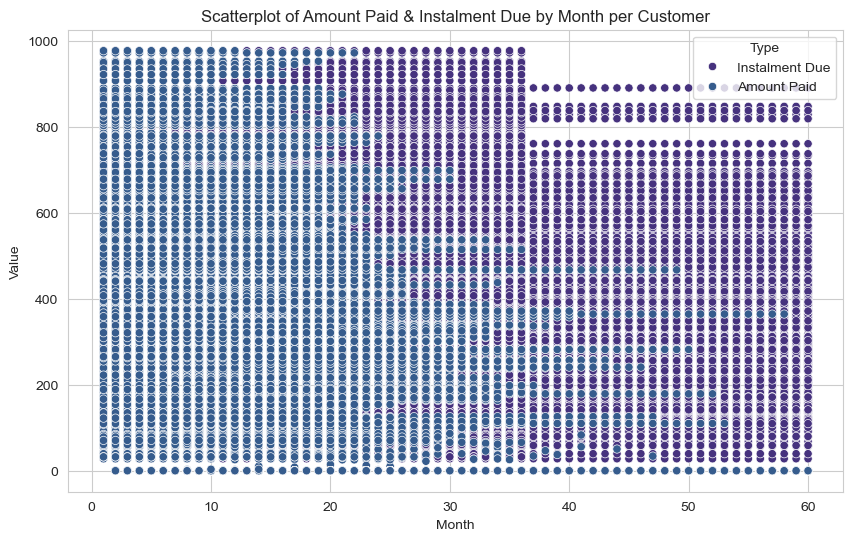

In [9]:

df_instalments_and_payments_melted = df_instalments_and_payments.melt(
    id_vars=["Month"], 
    value_vars=["Instalment Due", "Amount Paid"], 
    var_name="Type", 
    value_name="Value"
)

plotter2 = Plotter(df_instalments_and_payments_melted)
plotter2.scatterplot(
    x="Month", 
    y="Value", 
    hue="Type", 
    figsize=(10, 6),
    title="Scatterplot of Amount Paid & Instalment Due by Month per Customer" 
)


In [ ]:
def term_counts(df):
    
    charged_off_loans = df[df["loan_status"] == "Charged Off"].copy() 
    term_counts = charged_off_loans["term"].value_counts() 

    summary = {
        "36 Month Term Charged off Loans": term_counts.get("36 months", 0),
        "60 Month Term Charged Off Loans": term_counts.get("60 months", 0)
    } 

    
    summary_df = pd.DataFrame([summary])

    return summary_df

term_counts(df_fin)

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_25978/3824867155.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue,


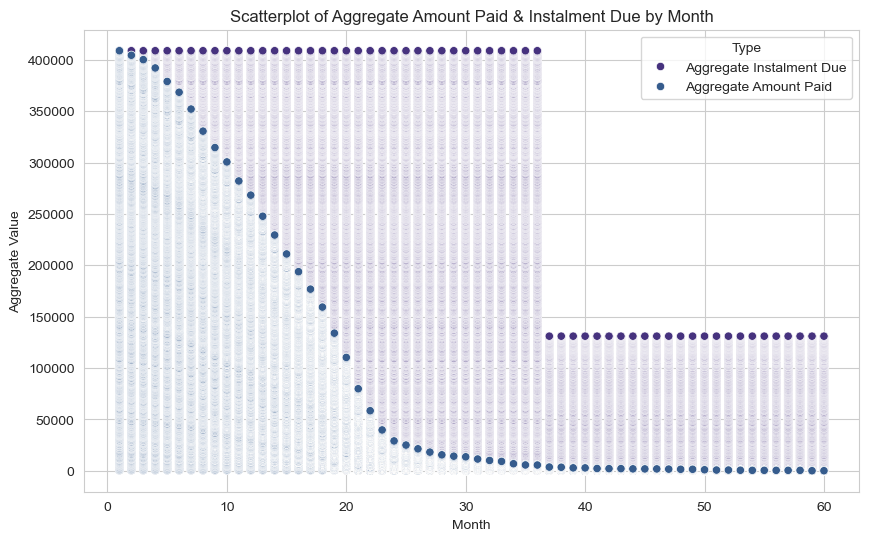

In [13]:
df_instalments_and_payments_aggregate = df_instalments_and_payments.copy()
df_instalments_and_payments_aggregate["Aggregate Instalment Due"] = (
    df_instalments_and_payments_aggregate.groupby("Month")["Instalment Due"].cumsum()
)
df_instalments_and_payments_aggregate["Aggregate Amount Paid"] = (
    df_instalments_and_payments_aggregate.groupby("Month")["Amount Paid"].cumsum()
)
df_aggregate_melted = df_instalments_and_payments_aggregate.melt(
    id_vars=["Month"], 
    value_vars=["Aggregate Instalment Due", "Aggregate Amount Paid"], 
    var_name="Type", 
    value_name="Aggregate Value"
)
plotter3 = Plotter(df_aggregate_melted)
plotter3.scatterplot(
    x="Month", 
    y="Aggregate Value", 
    hue="Type", 
    figsize=(10, 6),
    title="Scatterplot of Aggregate Amount Paid & Instalment Due by Month" 
)